Notebook to replicate the graphs on D. Hoang-Binh paper. The same graph created in notebook radiative_data_for_transition, but for different n

In [1]:
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np
import scipy.constants
import math

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

# Working with a Hydrogen atom
atom = Hydrogen()

# Define the transition we are studing
# Upper state
# n1 = 111
n1 = 112
# n1 = 120
# n1 = 200
# n1 = 1000
# Lower state: it is always 110
n2 = 110

In [2]:
# I am going to use a NumPy array to store the calculations data.
# 2 Dimensions: Rows are the number of l values calculating
#               Columns 9, defined as:
#                   0 : l value use in all calculations in this row
#                   1 : R(n1,l;n2,l-1) - using ARC
#                   2 : R(n1,l;n2,l+1) - using ARC
#                   3 : f(n2,l-1;n1,l) - this calculation will use value stored in [1]
#                   4 : f(n2,l+1;n1,l) - this calculation will use value stored in [2]
#                   5 : A(n1,l;n2,l-1) - using D. Hoang-Binh formula and value in [1]
#                   6 : A(n1,l;n2,l+1) - using D. Hoang-Binh formula and value in [2]
#                   7 : A(n1,l;n2,l-1) - using ARC and value in [1]
#                   8 : A(n1,l;n2,l+1) - using ARC and value in [2]
# Define varialbes for column index, for clarity
value_l = 0
R_l_minus1 = 1
R_l_plus1 = 2
f_l_minus1 = 3
f_l_plus1 = 4
A_l_minus1 = 5
A_l_plus1 = 6
A_arc_l_minus1 = 7
A_arc_l_plus1 = 8

# Define the values of l that we are going to calculate: comment the line not used
# Using a Numpy ndarray
# States calculated in the paper
#l_states = [0,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,105,106,107,108,109,110]

# Full use of the data structure
# columns = 8
# Only calculate the dipole moment
columns = 2
# All posible states for l, from 0 to n2
l_states = range(n2+1)

# Define the types of the columns
# Initialize the np array with zeros for the calculations and the type for the resusts
data = np.zeros((len(l_states),columns),dtype=np.float64)
# Append the list with l_states, they are cast to float
data = np.column_stack((l_states,data))


In [3]:
# Function to get the Dipole Moment from ARC and check that l state is valid
def getDipoleMoment( n1, l1, j1, n2, l2, j2 ):
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
        # Eq 2 in 
        R = atom.getRadialMatrixElement(n1, l1, j1, n2, l2, j2)
        return R
    else:
        return float('nan')
    
# Initialise the list that will contain the tuples with the data
plot_data = []
factor = (n1-n2)**(5/3)    
# Printing the table and doing the calculations
print('Table 1 Radiative data for transitions from n1 = %d n2 = %d in hydrogen (Z = 1)\n' % (n1,n2))
print('R(n1,l1;n2,l2)^2 Dipole moment for l')
print('  l\tl2= l1 -1\t\tl2= l1 +1')
print('-------------------------------------------------')
i=0 # Iterator for the row we are working on
for l in data[:,value_l]:
    # Each l is the value of l for this calculation
    l_int = int(l)
    # Here I square the dipole moment, so it is saved squared
    data[i][R_l_minus1] = getDipoleMoment(n1, l_int, l+0.5, n2, l_int-1, l-0.5)**2
    data[i][R_l_plus1] =  getDipoleMoment(n1, l_int, l+0.5, n2, l_int+1, l+0.5)**2
    
    print('%3d\t%9.3e\t\t%.3e ' % (l,data[i][R_l_minus1],data[i][R_l_plus1]))
    
    # Calculate the data to plot the next graphic
    # It is a list to tuple, each tuple is (x,y), where x = (l(l-l')/n') and y = [R(n,l;n',l')]**2
    if  not math.isnan(data[i][R_l_minus1]):
        plot_data.append((l_int/n2,factor * data[i][R_l_minus1]))
    
    if not math.isnan(data[i][R_l_plus1]):
        plot_data.append((-l_int/n2,factor * data[i][R_l_plus1]))    
    
    
    # Next iteration
    i+=1

Table 1 Radiative data for transitions from n1 = 112 n2 = 110 in hydrogen (Z = 1)

R(n1,l1;n2,l2)^2 Dipole moment for l
  l	l2= l1 -1		l2= l1 +1
-------------------------------------------------
  0	      nan		1.850e+06 
  1	1.959e+06		1.798e+06 
  2	2.014e+06		1.747e+06 
  3	2.071e+06		1.696e+06 
  4	2.129e+06		1.647e+06 
  5	2.188e+06		1.599e+06 
  6	2.248e+06		1.551e+06 
  7	2.309e+06		1.505e+06 
  8	2.372e+06		1.460e+06 
  9	2.435e+06		1.415e+06 
 10	2.500e+06		1.372e+06 
 11	2.566e+06		1.330e+06 
 12	2.633e+06		1.288e+06 
 13	2.701e+06		1.248e+06 
 14	2.770e+06		1.208e+06 
 15	2.840e+06		1.169e+06 
 16	2.912e+06		1.132e+06 
 17	2.985e+06		1.095e+06 
 18	3.059e+06		1.059e+06 
 19	3.134e+06		1.023e+06 
 20	3.210e+06		9.890e+05 
 21	3.287e+06		9.555e+05 
 22	3.366e+06		9.228e+05 
 23	3.445e+06		8.908e+05 
 24	3.526e+06		8.597e+05 
 25	3.608e+06		8.294e+05 
 26	3.691e+06		7.998e+05 
 27	3.775e+06		7.710e+05 
 28	3.860e+06		7.429e+05 
 29	3.946e+06		7.156e+05 
 30	4.033e+06		6.890e+05 

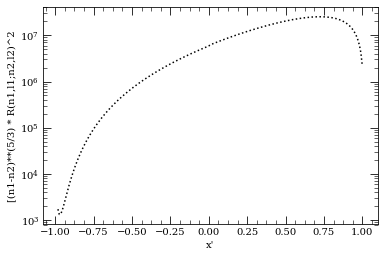

In [4]:
# Define a function to return the value of the first element of the tuple, so we can sort the X axis
def getKey(item):
    return item[0]

# Sort the x value on the plot_data and print the graphic
plot_data.sort(key=getKey)

x_axis = []
y_axis = []

for i in plot_data:
    x_axis.append(i[0])
    y_axis.append(i[1])


ax = plt.subplot(111)
#ax.plot(x_axis,y_axis)
ax.semilogy(x_axis,y_axis,"k:")
ax.set_xlabel(r"x'")
ax.set_ylabel(r"[(n1-n2)**(5/3) * R(n1,l1;n2,l2)^2")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


-----------------------------------------------------------------------------------------------------------------------------
Graph with all available states from l'= 1 to l' = 110
10 October 2018
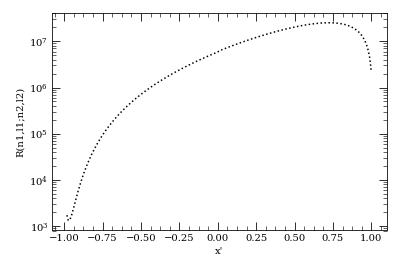

-----------------------------------------------------------------------------------------------------------------------------
Graph with states on the paper [0,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,105,106,107,108,109,110]
10 October 2018

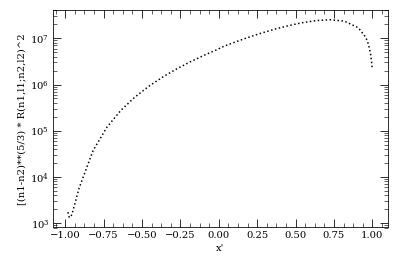

In [5]:
print(plot_data[0])

(-0.9818181818181818, 1728.5539884580983)


In [6]:
for i in plot_data:
    print(i)

(-0.9818181818181818, 1728.5539884580983)
(-0.9727272727272728, 1332.1331045347754)
(-0.9636363636363636, 1358.19734818159)
(-0.9545454545454546, 1602.7525450307608)
(-0.9454545454545454, 2027.2363194144557)
(-0.9363636363636364, 2634.0984049402373)
(-0.9272727272727272, 3439.6324923806565)
(-0.9181818181818182, 4465.481665107573)
(-0.9090909090909091, 5735.266840803515)
(-0.9, 7273.867988769861)
(-0.8909090909090909, 9105.36564945349)
(-0.8818181818181818, 11255.552583256207)
(-0.8727272727272727, 13748.91843315076)
(-0.8636363636363636, 16610.484786710516)
(-0.8545454545454545, 19864.71649422281)
(-0.8454545454545455, 23536.114345612776)
(-0.8363636363636363, 27649.165206096033)
(-0.8272727272727273, 32228.0144854914)
(-0.8181818181818182, 37296.77763320099)
(-0.8090909090909091, 42879.23710970333)
(-0.8, 48999.43208861704)
(-0.7909090909090909, 55681.09169725865)
(-0.7818181818181819, 62948.187821382555)
(-0.7727272727272727, 70824.15090558513)
(-0.7636363636363637, 79332.6854491218

Maximum:
(0.7272727272727273, 25218683.81769354)